<a href="https://colab.research.google.com/github/vbang247/python/edit/main/insurance-premium-prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
bmi = pd.read_csv('insurance.csv')
bmi.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,0,16884.92400
1,18,0,33.770,1,0,1,1725.55230
2,28,0,33.000,3,0,1,4449.46200
3,33,0,22.705,0,0,2,21984.47061
4,32,0,28.880,0,0,2,3866.85520


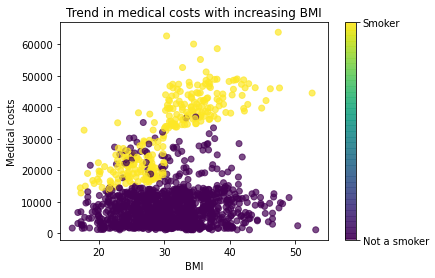

In [2]:
plt.scatter(bmi.loc[:, 'bmi'], bmi.loc[:,'charges'], c= bmi.loc[:, 'smoker'],alpha = 0.7)
cbar = plt.colorbar(ticks = [0,1])
cbar.set_ticklabels(['Not a smoker', 'Smoker'])
plt.xlabel('BMI')
plt.ylabel('Medical costs')
plt.title('Trend in medical costs with increasing BMI')
plt.show()

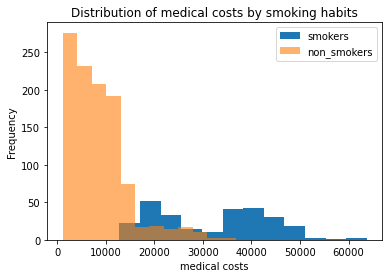

In [3]:
smokers = bmi.loc[:,'smoker'] == 1
non_smokers = bmi.loc[:,'smoker'] == 0
plt.hist(bmi.loc[smokers, 'charges'], 12 )
plt.hist(bmi.loc[non_smokers, 'charges'], 12, alpha = 0.6 )
plt.legend(['smokers','non_smokers'])
plt.xlabel('medical costs')
plt.ylabel('Frequency')
plt.title('Distribution of medical costs by smoking habits')
plt.show()

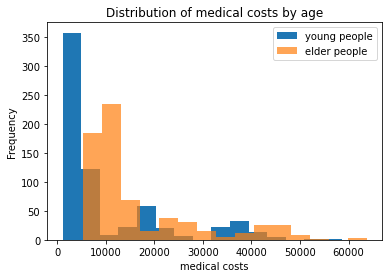

In [4]:
young = bmi.loc[:, 'age'] < 40
old = bmi.loc[:, 'age'] >= 40
plt.hist(bmi.loc[young, 'charges'], 15)
plt.hist(bmi.loc[old, 'charges'], 15, alpha = 0.7)
plt.legend(['young people', 'elder people'])
plt.ylabel('Frequency')
plt.xlabel('medical costs')
plt.title('Distribution of medical costs by age')
plt.show()

In [5]:
import numpy as np
Smoker = bmi.loc[ bmi.loc[ :, 'smoker'] == 1 ,'charges']
Non_smoker = bmi.loc[ bmi.loc[ :, 'smoker'] == 0 ,'charges']
 #

32050.23183153285
8434.268297856199


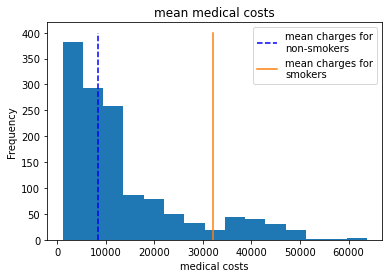

count     1064.000000
mean      8434.268298
std       5993.781819
min       1121.873900
25%       3986.438700
50%       7345.405300
75%      11362.887050
max      36910.608030
Name: charges, dtype: float64

In [6]:
import numpy as np
plt.hist(bmi.loc[:,'charges'], 15)
print(np.mean(Smoker))
print(np.mean(Non_smoker))
plt.plot([np.mean(Non_smoker), np.mean(Non_smoker)], [0, 400], "--", c = 'b')
plt.plot([np.mean(Smoker), np.mean(Smoker)], [0, 400])
plt.legend(['mean charges for\nnon-smokers', 'mean charges for\nsmokers'])
plt.xlabel('medical costs')
plt.ylabel('Frequency')
plt.title('mean medical costs')
plt.show()

bmi.loc[ bmi.loc[ :, 'smoker'] == 1 ,'charges'].describe()
bmi.loc[ bmi.loc[ :, 'smoker'] == 0 ,'charges'].describe()

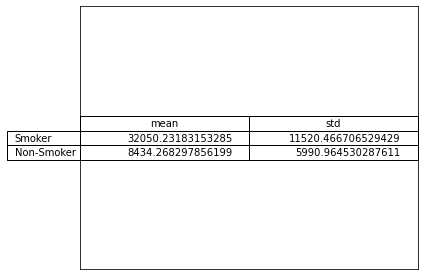

In [7]:
data = [[np.mean(Smoker), np.std(Smoker)], [np.mean(Non_smoker), np.std(Non_smoker)]]
columns = ['mean', 'std']
rows = ['Smoker', 'Non-Smoker']
fig, ax = plt.subplots()

# Hide axes
ax.xaxis.set_visible(False) 
ax.yaxis.set_visible(False)
fig.patch.set_visible(False)
ax.table(cellText=data,
                      rowLabels=rows,
                      colLabels=columns,
                      loc='center')


fig.tight_layout()
plt.show()

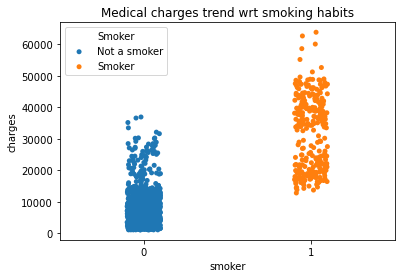

In [8]:
import seaborn as sns
sns.stripplot(x = bmi.loc[:, 'smoker'], y = bmi.loc[:, 'charges'], hue = bmi.loc[:, 'smoker'])
plt.legend(title='Smoker', loc='upper left', labels=['Not a smoker', 'Smoker'])
plt.title('Medical charges trend wrt smoking habits')
plt.show()

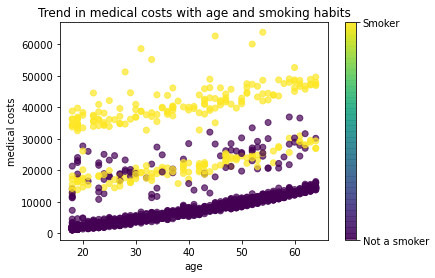

In [9]:
plt.scatter(bmi.loc[:, 'age'], bmi.loc[:, 'charges'], c = bmi.loc[:, 'smoker'], alpha = 0.7)
plt.xlabel('age')
plt.ylabel('medical costs')
cbar = plt.colorbar(ticks = [0,1])
cbar.set_ticklabels(['Not a smoker', 'Smoker'])
plt.title('Trend in medical costs with age and smoking habits')
plt.show()

In [10]:
bmi.groupby("smoker")["charges"].describe()

,count,mean,std,min,25%,50%,75%,max
smoker,,,,,,,,
0,1064.0,8434.268298,5993.781819,1121.8739,3986.438700,7345.40530,11362.887050,36910.60803
1,274.0,32050.231832,11541.547176,12829.4551,20826.244213,34456.34845,41019.207275,63770.42801
